# Calculating the reflectivity of a mirror using xrt
awojdyla@lbl.gov, Sept 2019

In this notebook, we use xrt to generate reflectivity curves for mirrors at grazing angle.

In [1]:
# uncomment the following line to install the xrt package if it's not already installed
# $ pip install xrt

In [2]:
import xrt.backends.raycing.materials as rm
import matplotlib.pyplot as plt
import periodictable as pt
import numpy as np

### Pick a material

In [3]:
# rho = pt.Ru.density
# mat = rm.Material('Ru',table='Henke',rho=rho)

# rho = pt.Au.density
# mat = rm.Material('Au',table='Henke',rho=rho)

# rho = pt.Ni.density
# mat = rm.Material('Ni',table='Henke',rho=rho)

# rho = pt.Si.density
# mat = rm.Material('Si',table='Henke',rho=rho)

# rho = pt.Pt.density
# mat = rm.Material('Pt',table='Henke',rho=rho)

rho = pt.Rh.density
mat = rm.Material('Rh',table='Henke',rho=rho)

# rho = pt.Ge.density
# mat = rm.Material('Ge',table='Henke',rho=rho)

# rho = pt.Ge.density
# mat = rm.Material('Ga',table='Henke',rho=rho)

# rho = pt.Fe.density
# mat = rm.Material('Fe',table='Henke',rho=rho)

# rho = pt.Cu.density
# mat = rm.Material('Cu',table='Henke',rho=rho)

# rho = pt.C.density
# mat = rm.Material('C',table='Henke',rho=rho)

# rho = pt.Cr.density
# mat = rm.Material('Cr',table='Henke',rho=rho)

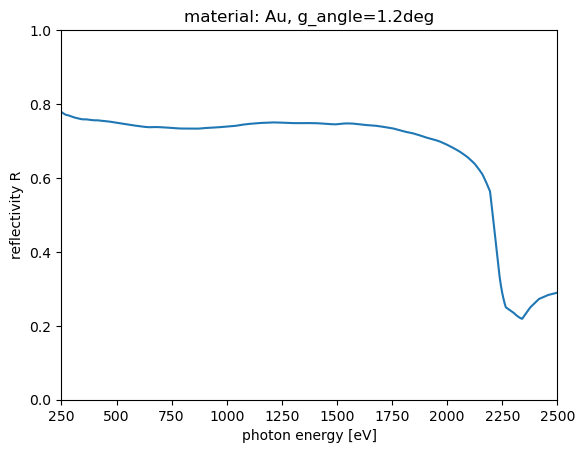

In [4]:
# Change "Au in the two lines for any other material"

rho = pt.Au.density
mat = rm.Material('Au',table='Henke',rho=rho)

E_min_eV = 250
E_max_eV = 2500

ga_rad = 1.25*np.pi/180

N_i = 2001
energies_eV = np.linspace(E_min_eV, E_max_eV, N_i)
R = np.zeros(N_i)
Rs = np.zeros(N_i)
Rp = np.zeros(N_i)
for i in np.arange(N_i):
    beamInDotNormal = np.cos(np.pi/2-ga_rad)
    (rs,rp,c,d) = mat.get_amplitude(energies_eV[i],beamInDotNormal)

    R[i] = 0.5*(np.abs(rs)**2+np.abs(rp)**2)
    Rs[i] = np.abs(rs)**2
    Rp[i] = np.abs(rp)**2
    
plt.plot(energies_eV, R)
#plt.plot(energies_eV, Rs, energies_eV, Rp)
plt.xlabel('photon energy [eV]')
plt.ylabel('reflectivity R')
plt.title('material: '+ mat.name+ ', g_angle=%1.1fdeg' %(ga_rad*180/np.pi))
plt.xlim((np.min(energies_eV),np.max(energies_eV)))
plt.ylim((0,1))

plt.show()

### Export to matlab if useful

In [5]:
# save as a matlab files, with 'E_eV' the photon energy scale, and 'R' the unpolarized reflectivity 
import scipy.io as sci
a={}
a['E_eV']=energies_eV
a['R']=R
sci.savemat('Au_05deg',a)
# and to load it back (for checks)
b = sci.loadmat('Au_05deg')

# in matlab you can then do "load Au_05deg"

### 2D display

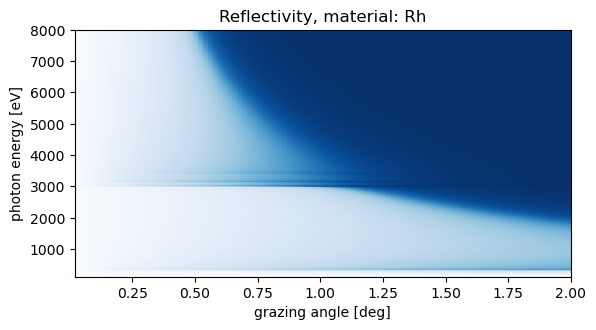

In [6]:
rho = pt.Rh.density
mat = rm.Material('Rh',table='Henke',rho=rho)

rho = pt.Rh.density
mat = rm.Material('Rh',table='Henke',rho=rho)

E_max_eV = 8000

ga_rad = 1*np.pi/180

N_a = 101
N_e = 501
energies_eV = np.linspace(100, E_max_eV, N_e)
angles_rad =  np.linspace(0, 2, N_a)*np.pi/180
R = np.zeros((N_e,N_a))
for i_a in np.arange(N_a):
    for i_e in np.arange(N_e):
        beamInDotNormal = np.cos(np.pi/2-angles_rad[i_a])
        (rs,rp,c,d) = mat.get_amplitude(energies_eV[i_e],beamInDotNormal)

        R[i_e,i_a] = 0.5*(np.abs(rs)**2+np.abs(rp)**2)

        
extent=(angles_rad[1]*180/np.pi, angles_rad[-1]*180/np.pi, energies_eV[1], energies_eV[-1])
aspect = (angles_rad[-1]*180/np.pi)/energies_eV[-1]*0.5
cmap = plt.cm.Blues_r
plt.imshow(R, extent=extent, aspect = aspect, origin='lower', cmap=cmap)
plt.xlabel('grazing angle [deg]')
plt.ylabel('photon energy [eV]')
plt.title('Reflectivity, material: '+ mat.name)

##plt.title('material: '+ mat.name+ ', g_angle=%1.1feV' %(ga_rad*180/np.pi))
#plt.xlim((np.min(energies_eV),np.max(energies_eV)))
#plt.ylim((0,1))

plt.show()